<a href="https://colab.research.google.com/github/mbr-ctrl/first_deep_learning_model/blob/main/classification_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# **Chargement des données**

In [20]:
# Charger des données IMDB
max_words = 10000
max_len = 500
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_words)

In [4]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [9]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()
# Mapper les indices aux mots
word_index = imdb.get_word_index()


In [12]:

# Inverser pour obtenir les mots pour chaque indice
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Fonction pour convertir une critique de film de la forme d'indices à la forme de mots
def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

# Afficher une critique de film décodée
decode_review(X_train[0])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should b

In [21]:
# Appliquer le padding sur les données d'entrainement
train_data = pad_sequences(train_data, maxlen=max_len)
# Appliquer le padding sur les données de test
test_data = pad_sequences(test_data, maxlen=max_len)

In [22]:
# Construire un modele
model = models.Sequential()
model.add(layers.Embedding(max_words, 16, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Compiler le modele
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
# Entrainement du modele
history = model.fit(train_data, train_labels, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.6663 - loss: 0.5699 - val_accuracy: 0.8534 - val_loss: 0.3333
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9211 - loss: 0.2101 - val_accuracy: 0.8678 - val_loss: 0.3283
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9722 - loss: 0.0840 - val_accuracy: 0.8516 - val_loss: 0.4326
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9931 - loss: 0.0251 - val_accuracy: 0.8464 - val_loss: 0.6260
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9987 - loss: 0.0050 - val_accuracy: 0.8400 - val_loss: 0.7805


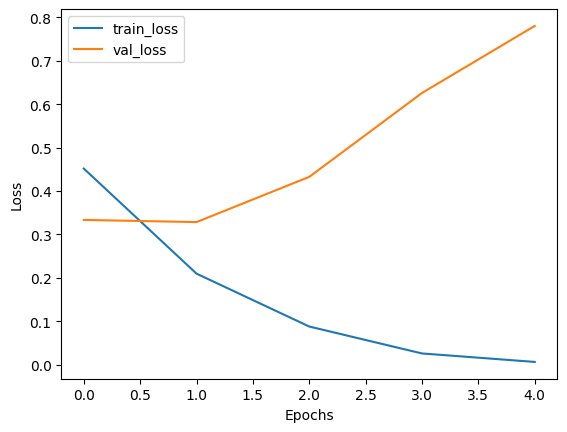

In [28]:
# Courbe de perte
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

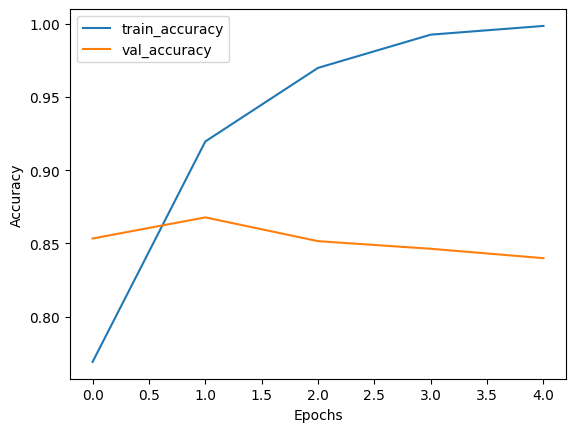

In [29]:
# Courbe de précision
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
# Prédictions
y_predict = (model.predict(test_data) > 0.5).astype("int32")

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [31]:
# Matrice de confusion
cm = confusion_matrix(test_labels, y_predict)

In [32]:
# Rapport de classification
print(classification_report(test_labels, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     12500
           1       0.84      0.85      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



Text(50.722222222222214, 0.5, 'True')

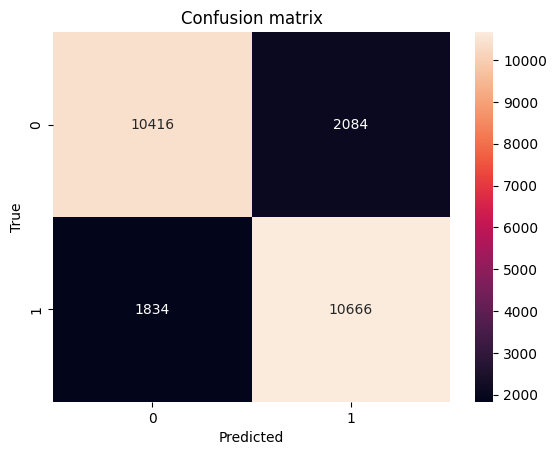

In [34]:
# Afficher la matrice de confusion
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')